# 💰 Análise de dados de clientes bancários
Essa base de dados foi retirada do [Kaggle](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn)
Ela possui dados referentes à clientes de um banco, nela é possível verificar algumas caracteríticas sobre comportamentos dos clientes.  
Os bancos utilizam esses dados majoritariamente para verificar a rotatividade de seus clientes, assim como criar programas de fidelidade e encontrar estratégias para encontrar novos clientes.  

O intuito dessa análise é explorar esses dados buscar alguns insights a fim de conseguir classificar os clientes baseados em seus países.  
Iremos iniciar classificando os países pelo seus respectivos scores, cruzar essa informação com o índice de satisfação no país e por fim verificar quantas pessoas geralmetne largam o banco.  
A ideia é encontrar países onde seria necessário realizar mais campanhas de fidelização.

# 🔧 Ferramentas utilizadas
* Python
* Jupyter lab(ou qualquer interpretador de código de sua preferência).
* Psycopg2 -> Biblioteca para integrar o Python com o banco de dados postgres.
* Gspread -> API para passar os dados para o Google Sheets

In [8]:
from dotenv import load_dotenv
load_dotenv()
from db_utils import get_engine, close_db_connection
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
connection = get_engine()

In [3]:
sql = 'SELECT * FROM customer_churns'
churns = pd.read_sql_query(sql, connection)

# Data exploration

In [5]:
churns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   row_number          10000 non-null  int64  
 1   customer_id         10000 non-null  int64  
 2   surname             10000 non-null  object 
 3   credit_score        10000 non-null  int64  
 4   geography           10000 non-null  object 
 5   gender              10000 non-null  object 
 6   age                 10000 non-null  int64  
 7   tenure              10000 non-null  int64  
 8   balance             10000 non-null  float64
 9   num_of_products     10000 non-null  int64  
 10  has_cr_card         10000 non-null  bool   
 11  is_active_member    10000 non-null  bool   
 12  estimated_salary    10000 non-null  float64
 13  exited              10000 non-null  bool   
 14  complain            10000 non-null  bool   
 15  satisfaction_score  10000 non-null  int64  
 16  card_

In [6]:
churns.describe()

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,estimated_salary,satisfaction_score,point_earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,5.000000,1000.000000


Let´s take a look at the correlation between the atributes.

<Axes: >

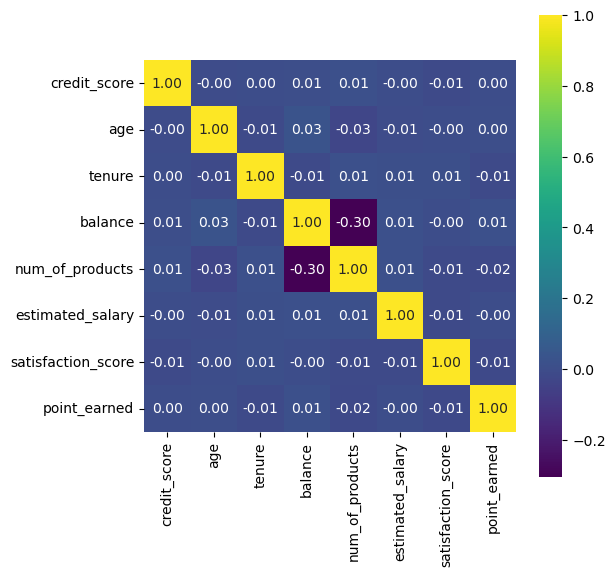

In [33]:
validation_atributes = churns.select_dtypes(include = ["int64", "float64"])
validation_atributes = validation_atributes.drop(columns=['row_number', 'customer_id'])
atributes_correlation = validation_atributes.corr()
plt.figure(figsize=(6,6))
sns.heatmap(atributes_correlation, annot=True, square=True, cmap='viridis', fmt='.2f')